In [3]:
# Stephen.Griffies@noaa.gov 

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mplsettings

import cartopy.crs as ccrs

%matplotlib inline

In [5]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"

import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [6]:
# static file 

fname_static = "../../common/CM4X_p125/ocean_annual.static.nc"
#fname_static = "/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc"
static       = xr.open_mfdataset(fname_static)

static = static.assign_coords({'geolon': static['geolon'], 'geolat': static['geolat']})
mask   = static['deptho']/static['deptho']

In [7]:
# Get the depth averaged velocities 

dsubar = xr.open_mfdataset('CM4X_p125_ubar.nc')
ubar   = dsubar['ubar']

dsvbar = xr.open_mfdataset('CM4X_p125_vbar.nc')
vbar   = dsvbar['vbar']

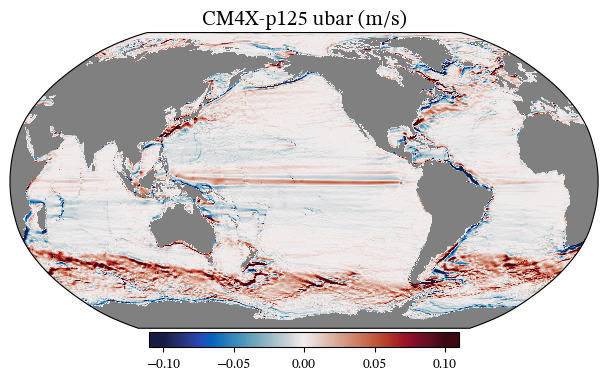

In [8]:
#map ubar
field = ubar 

vmin = -.1
vmax =  .1
levels = [-1, -.8, -.6, -.4, -.2, -.15, -.1, -.05, .05, .1, .15, .2, .4, .6, .8, 1.0]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon_u", y="geolat_u",
                     vmin=vmin, vmax=vmax,
#                     levels=levels,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
                     cmap=cmocean.cm.balance,
                     add_colorbar=False
                    )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 ubar (m/s)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=True, shrink=0.5,orientation='horizontal')
                     
plt.tight_layout()
plt.show()
fig.savefig('Fig04_CM4Xp125_ubar.jpg', bbox_inches='tight', dpi=400, format='jpeg')

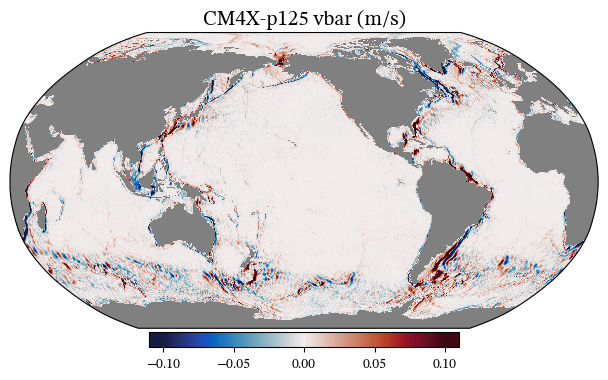

In [9]:
#map vbar
field = vbar 

vmin = -.1
vmax =  .1
levels = [-1, -.8, -.6, -.4, -.2, -.15, -.1, -.05, .05, .1, .15, .2, .4, .6, .8, 1.0]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon_v", y="geolat_v",
                     vmin=vmin, vmax=vmax,
#                     levels=levels,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
                     cmap=cmocean.cm.balance,
                     add_colorbar=False
                    )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 vbar (m/s)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=True, shrink=0.5,orientation='horizontal')
                     
plt.tight_layout()
plt.show()
fig.savefig('Fig04_CM4Xp125_vbar.jpg', bbox_inches='tight', dpi=400, format='jpeg')